### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/korean_apart.csv', low_memory= False)

In [2]:
a_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [3]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    object 
dtypes: float64(3), object(6)
memory usage: 343.5+ MB


In [4]:
a_df = a_df[a_df['층'] != ' '].reset_index(drop=True)

In [5]:
print(a_df['층'].unique())

['8' '2' '11' '7' '5' '10' '9' '13' '22' '12' '4' '20' '15' '3' '6' '1'
 '14' '-1' '39' '19' '17' '23' '21' '18' '35' '34' '24' '29' '27' '16'
 '25' '31' '32' '28' '30' '50' '26' '33' '37' '36' '51' '48' '43' '38'
 '46' '45' '49' '42' '40' '44' '41' '61' '52' '60' '55' '54' '64' '56'
 '47' '58' '53' '57' '59' '62' '66' '63' '-2' '-3' '65' '68' '67' '69'
 '75' '74' '71' '73' '70' '72' '77' '76' '79' '80' '83' '81' '-4' '78'
 '82' '1.0' '9.0' '6.0' '7.0' '10.0' '14.0' '15.0' '4.0' '5.0' '2.0'
 '12.0' '13.0' '16.0' '3.0' '8.0' '11.0' '17.0' '19.0' '18.0' '22.0'
 '20.0' '24.0' '21.0' '23.0' '25.0' '27.0' '26.0' '30.0' '29.0' '28.0'
 '39.0' '35.0' '38.0' '40.0' '32.0' '37.0' '33.0' '31.0' '34.0' '36.0'
 '41.0' '42.0' '45.0' '44.0' '43.0' '48.0' '47.0' '46.0' '-1.0' '49.0'
 '50.0']


In [6]:
a_df['층'] = a_df['층'].astype(float)
a_df['층'] = a_df['층'].astype(int)

In [7]:
a_df.isna().sum()

지역코드      0
동         0
거래일       0
아파트       0
지번      438
전용면적      0
층         0
건축년도     76
거래금액      0
dtype: int64

In [8]:
a_df = a_df.dropna().reset_index(drop=True)

In [9]:
a_df.isna().sum()

지역코드    0
동       0
거래일     0
아파트     0
지번      0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [10]:
columns = ['지역코드','전용면적','층','건축년도','거래금액']

pre_a_df = a_df.loc[:, columns]
pre_a_df

,지역코드,전용면적,층,건축년도,거래금액
0,31110.0,135.5800,8,1991.0,26700
1,31110.0,101.6000,2,2006.0,35500
2,31110.0,84.9920,11,2007.0,36500
3,31110.0,118.7060,8,2006.0,43000
4,31110.0,84.9636,7,2007.0,38700
...,...,...,...,...,...
5002319,50130.0,57.1300,6,2019.0,"19,500"
5002320,50130.0,49.8700,2,1999.0,"21,700"
5002321,50130.0,45.3100,1,2000.0,"9,300"
5002322,50130.0,51.8800,2,2003.0,"25,500"


In [11]:
pre_a_df['지역코드'].value_counts()

지역코드
41590.0    112522
41360.0     86199
41190.0     80877
41570.0     67515
44133.0     64606
            ...  
45740.0       286
47720.0       260
47760.0       134
47940.0        36
46910.0         9
Name: count, Length: 249, dtype: int64

In [12]:
import numpy as np

pre_a_df['지역코드'] = pre_a_df['지역코드'].astype(int)

In [13]:
pre_a_df

,지역코드,전용면적,층,건축년도,거래금액
0,31110,135.5800,8,1991.0,26700
1,31110,101.6000,2,2006.0,35500
2,31110,84.9920,11,2007.0,36500
3,31110,118.7060,8,2006.0,43000
4,31110,84.9636,7,2007.0,38700
...,...,...,...,...,...
5002319,50130,57.1300,6,2019.0,"19,500"
5002320,50130,49.8700,2,1999.0,"21,700"
5002321,50130,45.3100,1,2000.0,"9,300"
5002322,50130,51.8800,2,2003.0,"25,500"


In [14]:
pre_a_df['건축년도'] = pre_a_df['건축년도'].astype(int)

In [15]:
pre_a_df

,지역코드,전용면적,층,건축년도,거래금액
0,31110,135.5800,8,1991,26700
1,31110,101.6000,2,2006,35500
2,31110,84.9920,11,2007,36500
3,31110,118.7060,8,2006,43000
4,31110,84.9636,7,2007,38700
...,...,...,...,...,...
5002319,50130,57.1300,6,2019,"19,500"
5002320,50130,49.8700,2,1999,"21,700"
5002321,50130,45.3100,1,2000,"9,300"
5002322,50130,51.8800,2,2003,"25,500"


In [16]:
pre_a_df['거래금액'] = pre_a_df['거래금액'].str.replace(",", "")

In [17]:
pre_a_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.478979
층       0.194059
건축년도    0.189913
지역코드   -0.434602
Name: 거래금액, dtype: float64

In [18]:
pre_a_df['거래금액'] = pre_a_df['거래금액'].astype(float)

array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '전용면적'}>],
       [<Axes: title={'center': '층'}>, <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

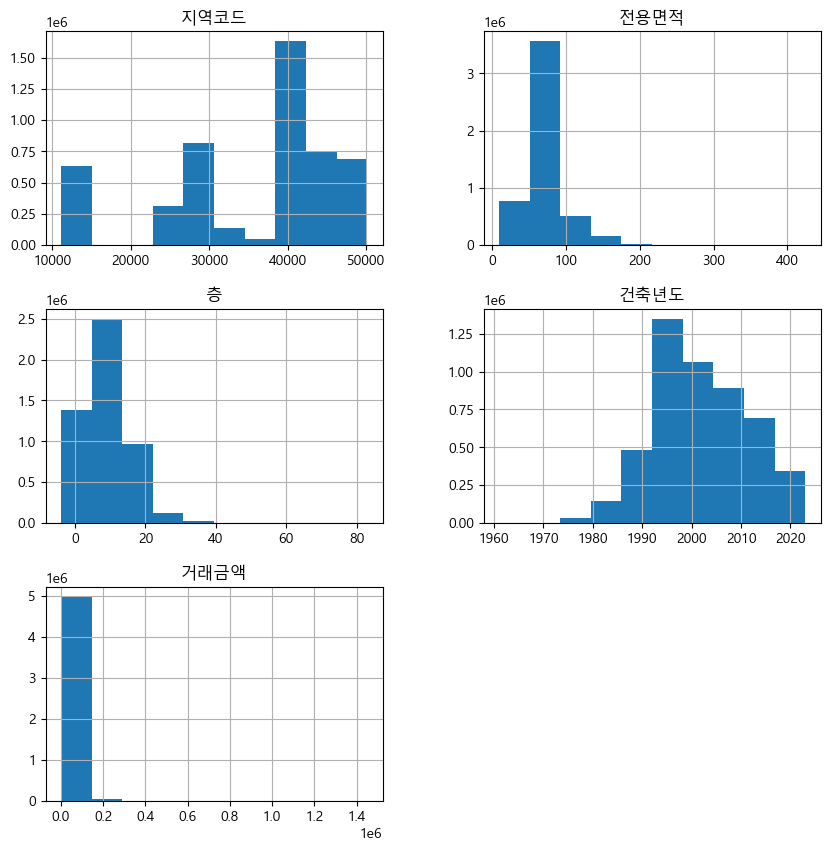

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
pre_a_df.hist(figsize=(10,10))

In [20]:
pre_a_df['거래금액'] = np.log1p(pre_a_df['거래금액'])

In [21]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          4.902e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:24:12   Log-Likelihood:                     -3.7193e+06
No. Observations:             5002324   AIC:                                  7.439e+06
Df Residuals:                 5002320   BIC:                                  7.439e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [23]:
get_vif(features)

,vif_score,feature
0,10.773557,지역코드
1,9.665633,전용면적
2,3.195887,층
3,21.537643,건축년도


In [24]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-2], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          3.450e+07
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:24:16   Log-Likelihood:                     -1.0965e+07
No. Observations:             5002324   AIC:                                  2.193e+07
Df Residuals:                 5002321   BIC:                                  2.193e+07
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
get_vif(features)

,vif_score,feature
0,5.214487,지역코드
1,5.926620,전용면적
2,3.013029,층


In [26]:
columns = ['동','아파트','지역코드',	'전용면적',	'층',	'건축년도',	'거래금액'] 

en_a_df = a_df.iloc[pre_a_df.index].loc[:, columns].reset_index(drop=True)

In [27]:
en_a_df

,동,아파트,지역코드,전용면적,층,건축년도,거래금액
0,학성동,남운학성타운,31110.0,135.5800,8,1991.0,26700
1,남외동,남외푸르지오1차,31110.0,101.6000,2,2006.0,35500
2,남외동,에일린의뜰,31110.0,84.9920,11,2007.0,36500
3,남외동,남외푸르지오1차,31110.0,118.7060,8,2006.0,43000
4,남외동,남외푸르지오2차,31110.0,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...
5002319,대정읍 하모리,더그라벨아파트,50130.0,57.1300,6,2019.0,"19,500"
5002320,동홍동,주공5차(동홍5차),50130.0,49.8700,2,1999.0,"21,700"
5002321,서홍동,서홍반석타운,50130.0,45.3100,1,2000.0,"9,300"
5002322,중문동,중문푸른마을,50130.0,51.8800,2,2003.0,"25,500"


In [28]:
print(en_a_df['아파트'].unique())

['남운학성타운' '남외푸르지오1차' '에일린의뜰' ... '서귀포혁신사랑으로부영아파트' '캐슬휘닉스더퍼스트' '중문스마트빌']


In [29]:
en_a_df['아파트'] = en_a_df['아파트'].apply(lambda x: x.split('(')[0].strip())

In [30]:
# '아파트' 열에서 문자열이 아닌 값을 NaN으로 대체합니다.
en_a_df.loc[~en_a_df['아파트'].str.isalpha(), '아파트'] = np.nan

# NaN 값이 있는 행을 삭제합니다.
en_a_df.dropna(subset=['아파트'], inplace=True)


In [31]:
print(en_a_df['아파트'].unique())

['남운학성타운' '에일린의뜰' '백합' ... '서귀포혁신사랑으로부영아파트' '캐슬휘닉스더퍼스트' '중문스마트빌']


In [32]:
en_a_df = en_a_df[en_a_df['아파트'] != ''].reset_index(drop=True)

In [33]:
print(en_a_df['동'].unique())

['학성동' '남외동' '다운동' ... '금성면 갈사리' '한림읍 수원리' '법환동']


In [34]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

columns = ['동','아파트']

label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(en_a_df[column])
    label_encoders[column] = encoder.classes_
    en_a_df[column] = result

label_encoders

{'동': array(['가경동', '가곡동', '가남읍 신해리', ..., '흥해읍 초곡리', '흥해읍 학성리', '흥해읍 학천리'],
       dtype=object),
 '아파트': array(['AK휴엘아파트', 'AK휴웰아파트', 'ALTOHAUS', ..., '힐팰리스', '힐포레아파트', '힐하우스'],
       dtype=object)}

In [35]:
en_a_df['거래금액'] = en_a_df['거래금액'].str.replace(",", "")

In [36]:
en_a_df['거래금액'] = en_a_df['거래금액'].astype(float)

array([[<Axes: title={'center': '동'}>, <Axes: title={'center': '아파트'}>,
        <Axes: title={'center': '지역코드'}>],
       [<Axes: title={'center': '전용면적'}>, <Axes: title={'center': '층'}>,
        <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >, <Axes: >]],
      dtype=object)

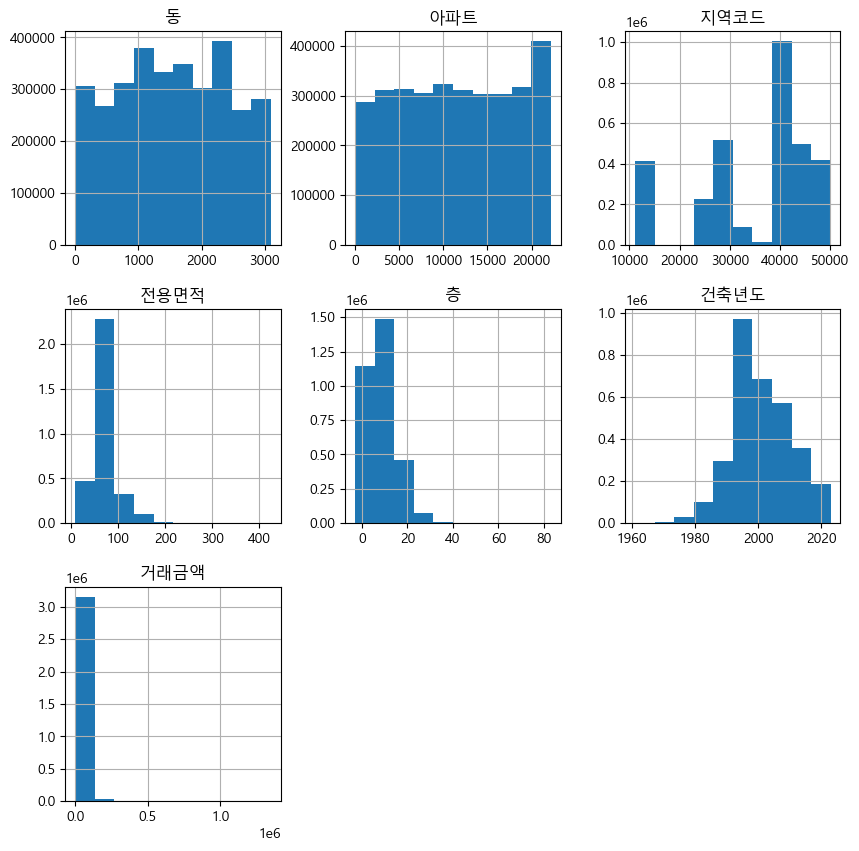

In [37]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
en_a_df.hist(figsize=(10,10))

In [38]:
en_a_df['거래금액'] = np.log1p(en_a_df['거래금액'])

In [39]:
en_a_df['전용면적'] = np.log1p(en_a_df['전용면적'])

array([[<Axes: title={'center': '동'}>, <Axes: title={'center': '아파트'}>,
        <Axes: title={'center': '지역코드'}>],
       [<Axes: title={'center': '전용면적'}>, <Axes: title={'center': '층'}>,
        <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >, <Axes: >]],
      dtype=object)

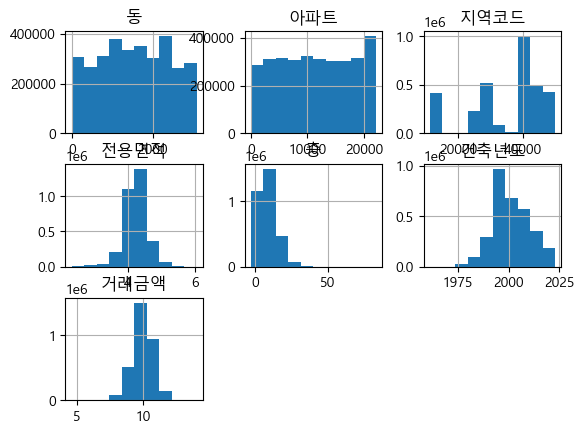

In [40]:
en_a_df.hist()

In [41]:
from statsmodels.api import OLS

features, targets = en_a_df.iloc[:, :-1], en_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.076e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:24:26   Log-Likelihood:                     -2.3594e+06
No. Observations:             3184057   AIC:                                  4.719e+06
Df Residuals:                 3184051   BIC:                                  4.719e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
get_vif(features)

,vif_score,feature
0,4.282434,동
1,4.216126,아파트
2,10.515288,지역코드
3,154.227590,전용면적
4,3.147494,층
5,167.918066,건축년도


In [43]:
en_a_df = en_a_df.drop(labels=['건축년도'], axis=1)

In [44]:
from statsmodels.api import OLS

features, targets = en_a_df.iloc[:, :-1], en_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.370e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:24:31   Log-Likelihood:                     -3.3087e+06
No. Observations:             3184057   AIC:                                  6.617e+06
Df Residuals:                 3184052   BIC:                                  6.617e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
get_vif(features)

,vif_score,feature
0,4.259160,동
1,4.168406,아파트
2,9.693863,지역코드
3,16.117963,전용면적
4,3.147086,층


In [46]:
en_a_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.587670
층       0.270240
동       0.014887
아파트    -0.013915
지역코드   -0.459630
Name: 거래금액, dtype: float64

In [49]:
new_a_df = en_a_df.loc[:, en_a_df.columns != '아파트']

In [51]:
new_a_df

,동,지역코드,전용면적,층,거래금액
0,2871,31110.0,4.916911,8,10.192456
1,433,31110.0,4.454254,11,10.505095
2,433,31110.0,4.751299,2,10.621352
3,433,31110.0,4.454254,5,10.434145
4,433,31110.0,4.200505,5,8.987322
...,...,...,...,...,...
3184052,634,50130.0,4.062682,3,9.825580
3184053,634,50130.0,4.062682,6,9.878221
3184054,1388,50130.0,3.835358,1,9.137877
3184055,2479,50130.0,3.968025,2,10.146473


In [50]:
from statsmodels.api import OLS

features, targets = new_a_df.iloc[:, :-1], new_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.703e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:26:33   Log-Likelihood:                     -3.3171e+06
No. Observations:             3184057   AIC:                                  6.634e+06
Df Residuals:                 3184053   BIC:                                  6.634e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
get_vif(features)

,vif_score,feature
0,4.174750,동
1,9.642021,지역코드
2,14.390620,전용면적
3,3.146923,층


In [53]:
new_a_df = en_a_df.loc[:, en_a_df.columns != '동']

In [54]:
new_a_df

,아파트,지역코드,전용면적,층,거래금액
0,2893,31110.0,4.916911,8,10.192456
1,13644,31110.0,4.454254,11,10.505095
2,13644,31110.0,4.751299,2,10.621352
3,13644,31110.0,4.454254,5,10.434145
4,7788,31110.0,4.200505,5,8.987322
...,...,...,...,...,...
3184052,4436,50130.0,4.062682,3,9.825580
3184053,4436,50130.0,4.062682,6,9.878221
3184054,10285,50130.0,3.835358,1,9.137877
3184055,17484,50130.0,3.968025,2,10.146473


In [55]:
from statsmodels.api import OLS

features, targets = new_a_df.iloc[:, :-1], new_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.703e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:27:31   Log-Likelihood:                     -3.3171e+06
No. Observations:             3184057   AIC:                                  6.634e+06
Df Residuals:                 3184053   BIC:                                  6.634e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
get_vif(features)

,vif_score,feature
0,4.085794,아파트
1,9.623374,지역코드
2,14.485372,전용면적
3,3.146576,층


In [57]:
new_a_df = en_a_df.loc[:, en_a_df.columns != '지역코드']

In [58]:
from statsmodels.api import OLS

features, targets = new_a_df.iloc[:, :-1], new_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.565e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:28:02   Log-Likelihood:                     -3.4508e+06
No. Observations:             3184057   AIC:                                  6.902e+06
Df Residuals:                 3184053   BIC:                                  6.902e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
get_vif(features)

,vif_score,feature
0,4.228189,동
1,4.146113,아파트
2,8.548901,전용면적
3,3.135548,층


In [ ]:
new_a_df

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = new_a_df.iloc[:, :-1], new_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [62]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.3721, RMSE: 0.6100, MSLE: 0.0031, RMSLE: 0.0559, R2: 0.3758


In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [66]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.3673, RMSE: 0.6060, MSLE: 0.0031, RMSLE: 0.0553, R2: 0.3839
